# **Análisis Predictivo y Descriptivo del Impacto de Factores Demográficos y Económicos en los Niveles de Ingresos en Canadá**

**CIS Dataset Dictionary**

- PERSONID -> Unique identifier for each individual in the dataset.
- Weight -> Survey weight assigned to each individual to adjust for sampling representation.
- Province -> The province in which the individual resides.
- MBMREGP -> Market Basket Measure Region Code, used for assessing poverty levels.
- Age_gap -> Age category or age gap classification of the individual.
- Gender -> Gender of the individual (e.g., Male, Female, Other).
- Marital_status -> Gender of the individual (e.g., Male, Female, Other).
- Highschool -> Indicates whether the individual has completed high school (Yes/No).
- Highest_edu -> The highest level of education attained by the individual.
- Work_ref -> Employment status reference (e.g., Employed, Unemployed, Retired)
- Work_yearly -> Total number of years the individual has been employed.
- Emp_week_ref -> Number of weeks worked in a reference period.
- Total_hour_ref -> Total hours worked in the reference period.
- paid_emp__ref -> Number of weeks worked as a paid employee.
- self_emp_ref -> Number of weeks worked as a self-employed individual.
- Immigrant -> Indicates whether the individual is an immigrant (Yes/No).
- Year_immigrant -> The year the individual immigrated to the country.
- income_after_tax -> The individual's total income after taxes.
- Cap_gain -> Capital gains earned by the individual.
- Childcare_expe -> Total expenses incurred for childcare.
- Child_benefit -> Government benefits received for childcare.
- CPP_QPP -> Canada Pension Plan (CPP) or Quebec Pension Plan (QPP) contributions.
- Earning -> Total earnings of the individual before deductions.
- Guaranteed_income -> Guaranteed income supplement received.
- Investment -> Total investment income of the individual.
- Old_age_pension -> Old Age Security (OAS) pension received.
- Private_pension -> Private pension plan contributions.
- Self_emp_income -> Income earned through self-employment.
- Pension -> Total pension income received from various sources.
- Total_income -> Sum of all income sources before deductions.
- Emp_insurance -> Employment insurance benefits received.
- Salary_wages -> Salary and wages earned from employment.
- compensation -> Any compensation received due to work-related matters.
- Family_mem -> Number of family members in the household.
- CFCOMP -> Family composition classification.
- CONDMP -> Type of dwelling or housing condition.
- RENTM -> Monthly rent paid for housing.

# Paso 1: definición del problema.
## Este proyecto tiene el potencial de ofrecer insights valiosos para diseñar políticas públicas, programas sociales y estrategias individuales para mejorar la movilidad económica
## Objetivos
- Objetivo General:
  Analizar y predecir los factores clave que influyen en los niveles de ingresos y el bienestar 
financiero en Canadá.
- Objetivos Específicos:
  1. Identificar las variables más relevantes que afectan los ingresos mediante técnicas de selección 
de características.
  2. Predecir los ingresos individuales utilizando modelos de Machine Learning supervisado.
  3. Visualizar las desigualdades regionales y por grupo demográfico en el bienestar financiero.

Importación de las librerías necesarias

In [1]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Módulo para interactuar con el sistema operativo de forma sencilla:
import os


# Paso 2. Lectura de datos.


In [2]:
# Importamos el dataset público.

import kagglehub

path = kagglehub.dataset_download("aradhanahirapara/income-survey-finance-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\fgdel\.cache\kagglehub\datasets\aradhanahirapara\income-survey-finance-analysis\versions\1


In [3]:
# Lista los archivos en la ruta

files = os.listdir(path)
print("Archivos en el dataset:", files)


Archivos en el dataset: ['Income Survey Dataset.csv', 'Income_Dataset_Dictionary.docx']


In [4]:
# Cargar el archivo CSV en un DataFrame

dataset_path = os.path.join(path, "Income Survey Dataset.csv")
data = pd.read_csv(dataset_path)
data.head()


,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


# Paso 3. Exploración y limpieza de datos.
## Paso 3.1 Comprensión de las características.

In [5]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} voluntarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 72643 voluntarios, con un total de 38 datos característicos de cada uno de ellos.


## Paso 3.2 Identificación de valores duplicados y nulos.

In [6]:
# Información sobre las columnas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immigrant     726

- En este punto conocemos que todas las variables son numéricas y por exigencias del proyecto transformaremos una de estas variables ("Province") a categórica.
- También conocemos que no existen valores nulos

In [7]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


In [8]:
# Resumen estadístico de las columnas numéricas
print(data.describe())


           PersonID        Weight      Province       MBMREGP       Age_gap  \
count  72643.000000  72643.000000  72643.000000  72643.000000  72643.000000   
mean   36322.000000    507.016134     34.771458     20.433242      9.038201   
std    20970.372139    622.308449     14.634608     10.755268      4.499854   
min        1.000000     10.856700     10.000000      1.000000      1.000000   
25%    18161.500000    151.937850     24.000000     13.000000      5.000000   
50%    36322.000000    283.111000     35.000000     19.000000     10.000000   
75%    54482.500000    605.346400     47.000000     28.000000     13.000000   
max    72643.000000   8863.955800     59.000000     40.000000     15.000000   

            Gender  Marital_status    Highschool   Highest_edu      Work_ref  \
count  72643.00000    72643.000000  72643.000000  72643.000000  72643.000000   
mean       1.51113       21.930881      2.311537      3.525199      2.167284   
std        0.49988       38.486236      2.259477

### Modificamos la columna "Province" de numérica a categórica

In [9]:
# Transformamos la variable numérica "Province" a categórica.

# ESTO LO PASAMOS AL INICIO COMO INTRODUCCIÓN APROVECHANDO EL MAPEO SOLO A TÍTULO DE EXPLICACIÓN DE QUE SIGNIFICA CADA VALOR NUMÉRICO EN ESTA VARIABLE
"""
valores = data["Province"].unique().tolist()

print(valores)

# Creamos un diccionario de mapeo:
mapeo = {
    10: "Newfoundland and Labrador",
    11: "Prince Edward Island",
    12: "Nova Scotia",
    13: "New Brunswick",
    24: "Quebec",
    35: "Ontario",
    46: "Manitoba",
    47: "Saskatchewan",
    48: "Alberta",
    59: "British Columbia"
}

# Reemplazamos los números en la columna por los nombres
data["Province_c"] = data["Province"].replace(mapeo)

print(data["Province_c"])
"""

'\nvalores = data["Province"].unique().tolist()\n\nprint(valores)\n\n# Creamos un diccionario de mapeo:\nmapeo = {\n    10: "Newfoundland and Labrador",\n    11: "Prince Edward Island",\n    12: "Nova Scotia",\n    13: "New Brunswick",\n    24: "Quebec",\n    35: "Ontario",\n    46: "Manitoba",\n    47: "Saskatchewan",\n    48: "Alberta",\n    59: "British Columbia"\n}\n\n# Reemplazamos los números en la columna por los nombres\ndata["Province_c"] = data["Province"].replace(mapeo)\n\nprint(data["Province_c"])\n'

## Paso 4. Análisis de correlación de variables

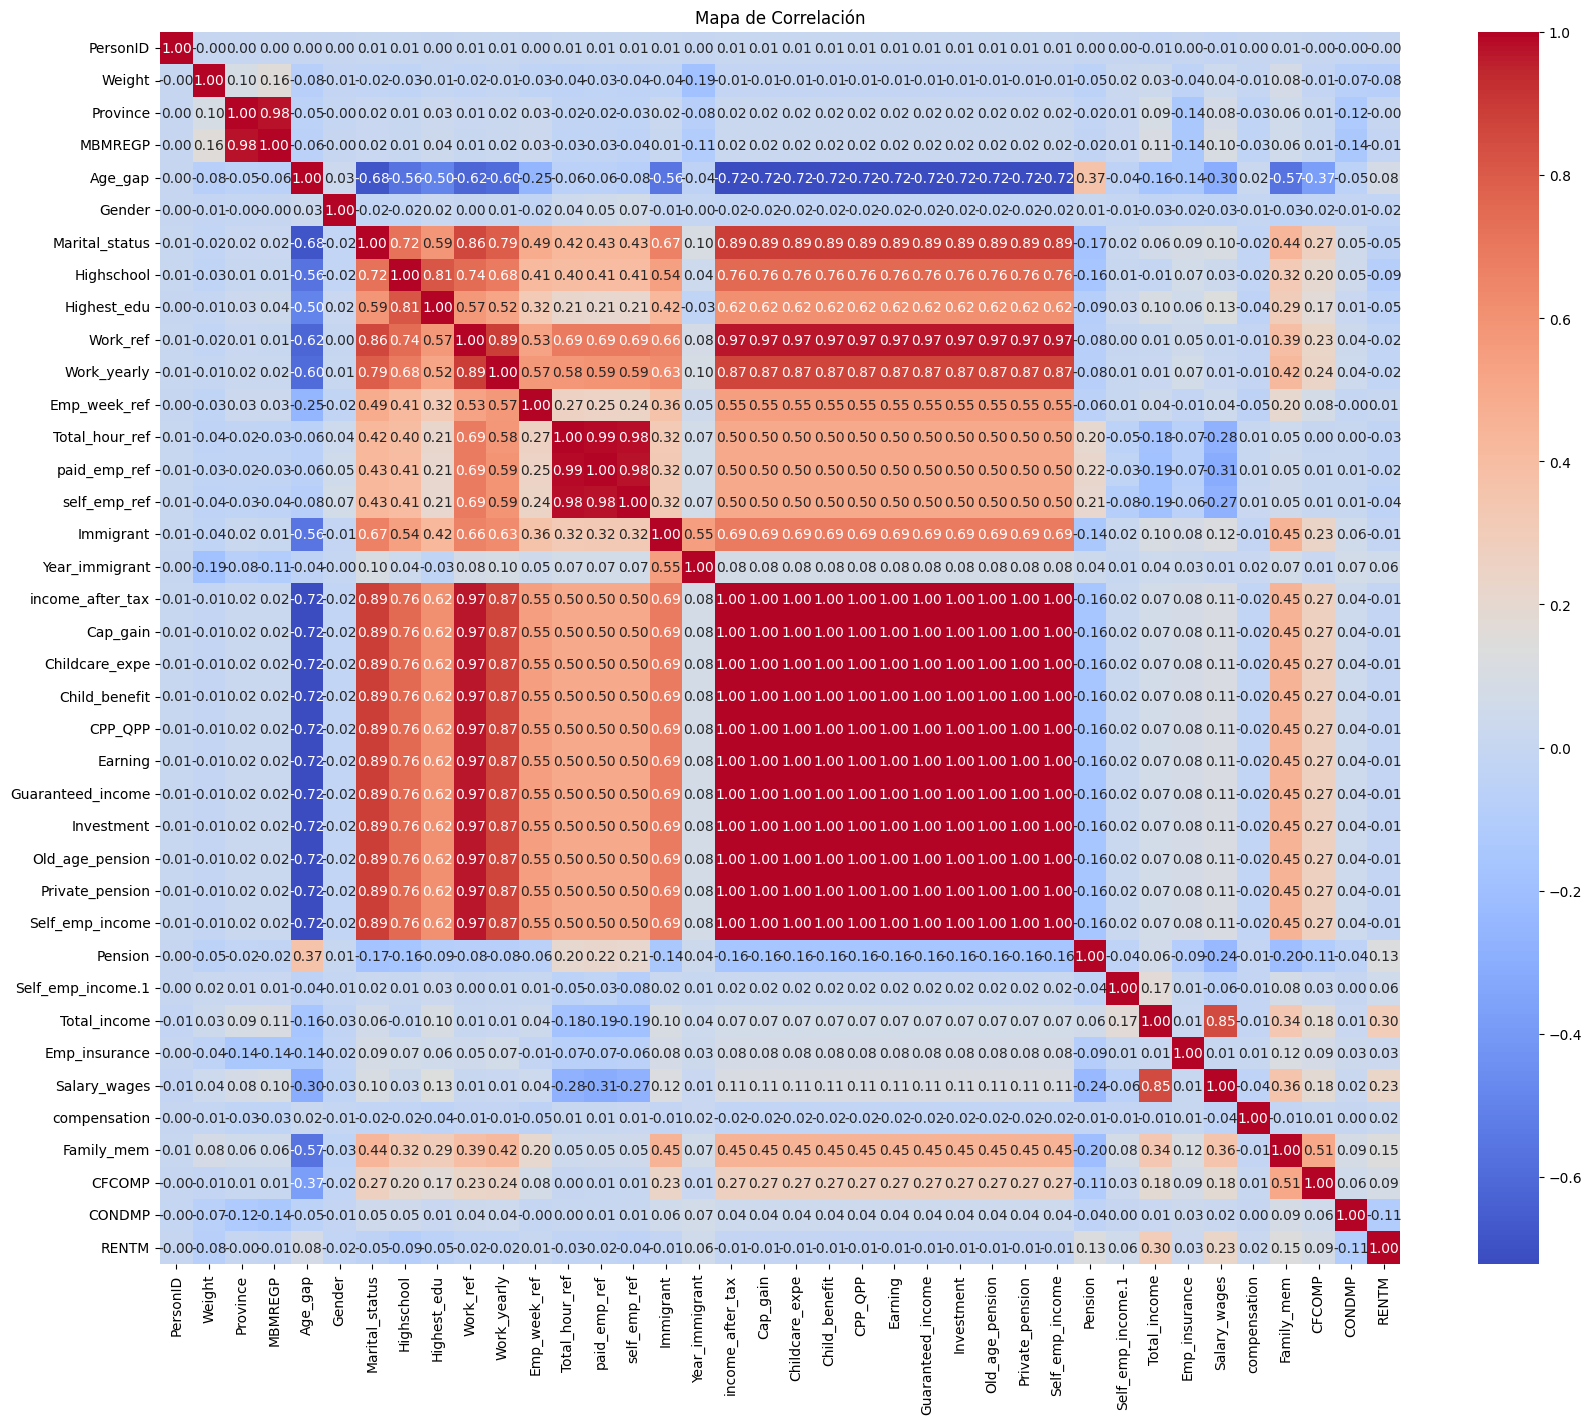

In [10]:
# Nuestra variable target sería "income_after_tax"

# Calculamos las correlaciones
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()


## Paso 4 Análisis de Variables Categóricas y Numéricas

# AQUI LA DUDA ES SI COMENZAR A ELIMINAR VARIABLES YA O REALIZAR PRIMERO UN ANÁLISIS

In [11]:
# Separar columnas numéricas y categóricas
num_cols = data.select_dtypes(include=["number"]).columns
cat_cols = data.select_dtypes(exclude=["number"]).columns

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: Index(['PersonID', 'Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender',
       'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref',
       'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref',
       'self_emp_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning',
       'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension',
       'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Total_income',
       'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP',
       'CONDMP', 'RENTM'],
      dtype='object')
Variables categóricas: Index([], dtype='object')


In [12]:
# Ver distribución de categorías en cada variable categórica
for col in cat_cols:
    print(f"\nDistribución de {col}:")
    print(data[col].value_counts(normalize=True) * 100)  # En porcentaje

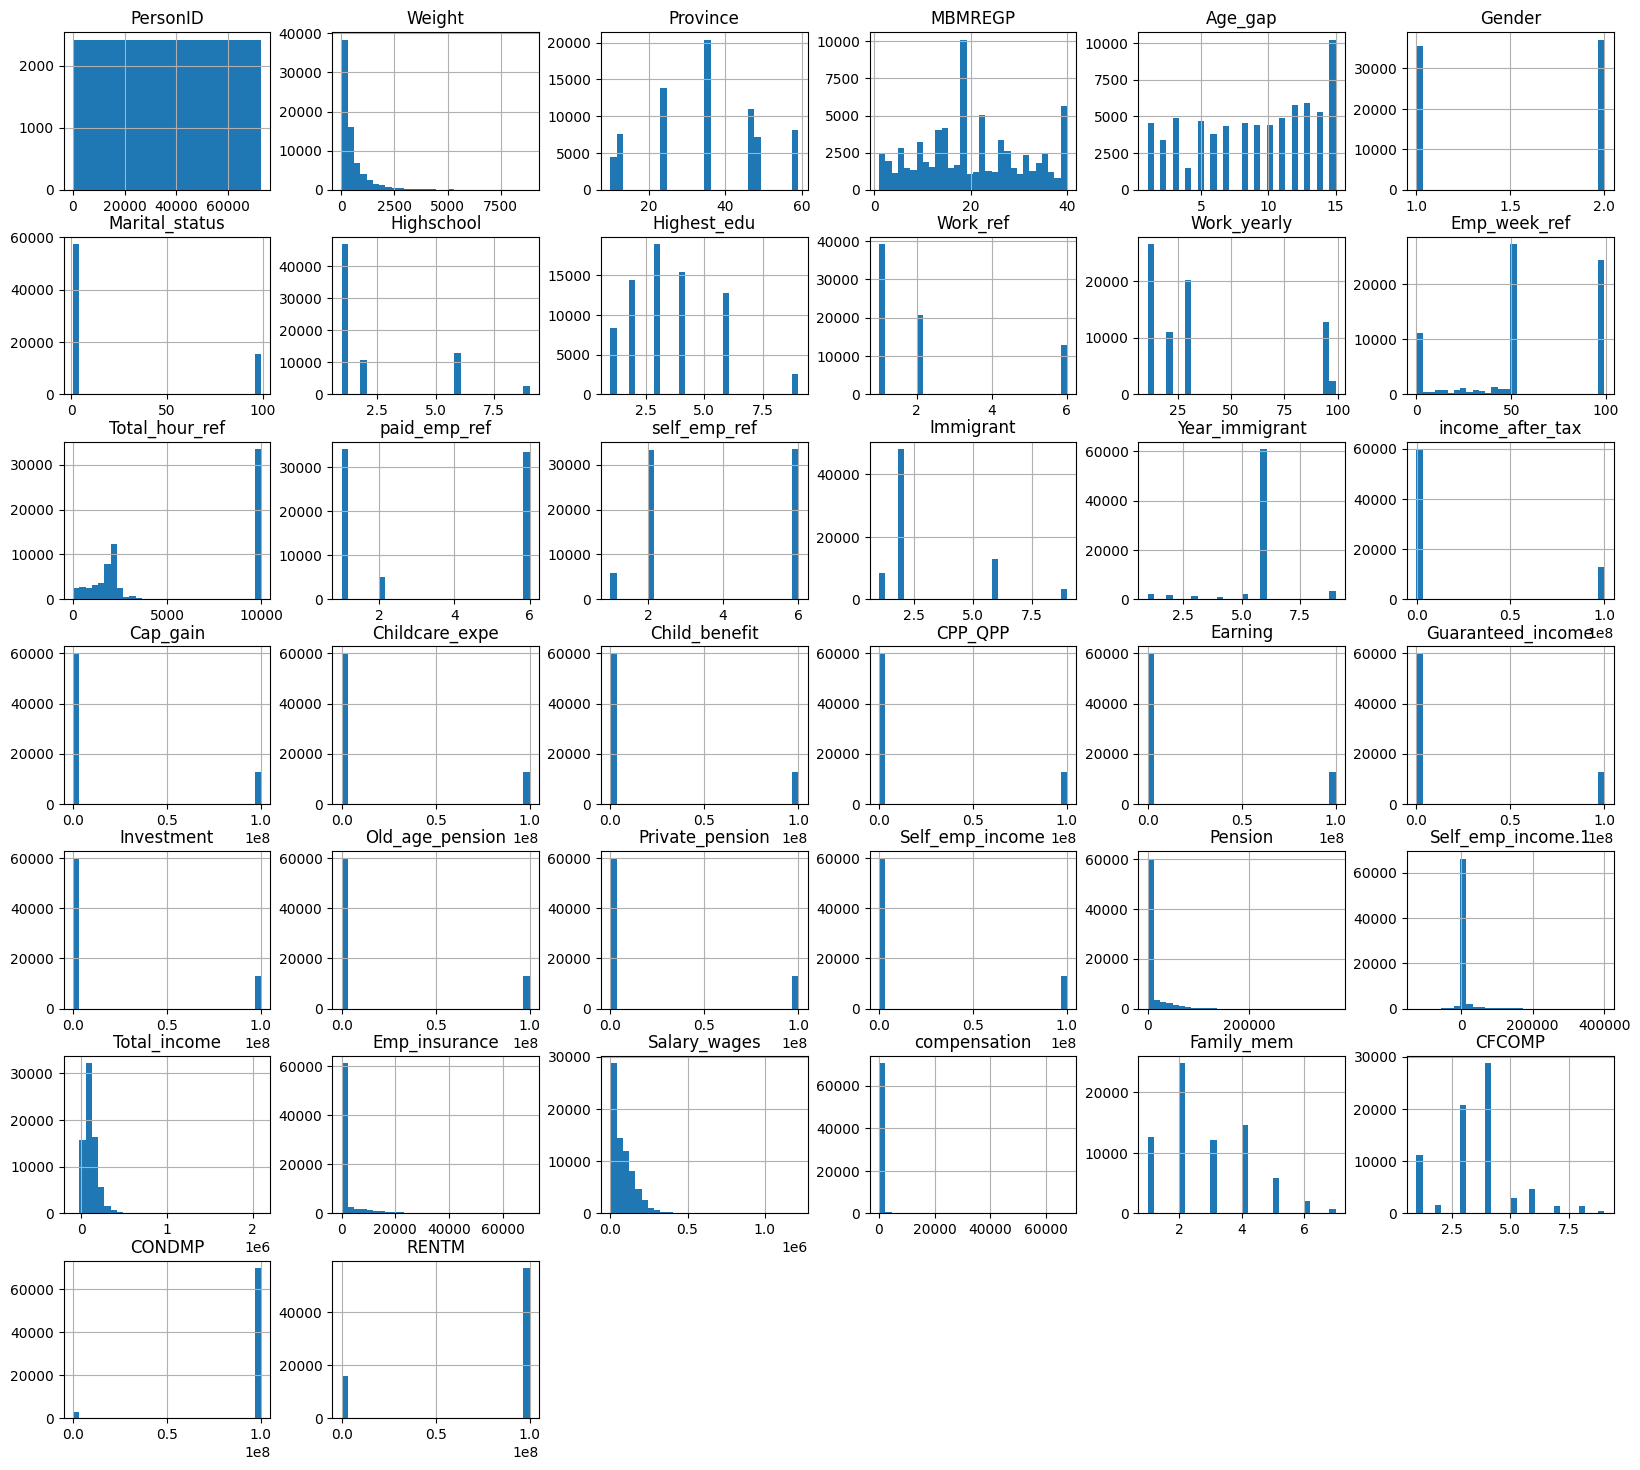

In [13]:
# Histograma de variables numéricas
data[num_cols].hist(figsize=(20, 18), bins=30)
plt.show()

In [14]:
# Visualizar los nombres de las columnas
print(data.columns)

Index(['PersonID', 'Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender',
       'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref',
       'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref',
       'self_emp_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning',
       'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension',
       'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Total_income',
       'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP',
       'CONDMP', 'RENTM'],
      dtype='object')


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset (assuming it's in a DataFrame called df)
# df = pd.read_csv("your_file.csv")  # Uncomment if loading from file

# Drop non-numeric columns before VIF calculation
numeric_df = data.select_dtypes(include=[np.number]).drop(columns=['PersonID', 'Weight'])  # IDs & survey weight

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature           VIF
7            Work_ref  2.166308e+03
12       self_emp_ref  2.729358e+02
11       paid_emp_ref  2.593606e+02
10     Total_hour_ref  2.118118e+02
0            Province  1.521742e+02
1             MBMREGP  1.075151e+02
14     Year_immigrant  4.285711e+01
28       Total_income  3.566430e+01
30       Salary_wages  2.563256e+01
2             Age_gap  2.494558e+01
6         Highest_edu  1.687632e+01
8         Work_yearly  1.374062e+01
13          Immigrant  1.213850e+01
3              Gender  1.156715e+01
32         Family_mem  1.138432e+01
5          Highschool  1.049841e+01
33             CFCOMP  8.762781e+00
9        Emp_week_ref  8.376187e+00
4      Marital_status  6.959748e+00
26            Pension  5.677032e+00
27  Self_emp_income.1  2.468593e+00
29      Emp_insurance  1.245534e+00
31       compensation  1.050038e+00
35              RENTM -5.834634e-02
34             CONDMP -7.225553e-02
20            Earning -7.519498e+04
15   income_after_tax -1.360

In [16]:
columns_to_drop = ['PersonID', 'Weight', 'Pension', 'Total_income', 'Work_yearly', 'Emp_week_ref', 
                   'Total_hour_ref', 'paid_emp_ref', 'self_emp_ref', 'CPP_QPP', 'Guaranteed_income',
                   'Old_age_pension', 'Private_pension', 'Self_emp_income', 'Earning',
                   'Child_benefit', 'Childcare_expe', 'Cap_gain', 'Investment']

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,Year_immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,59,38,15,2,3,1,3,2,2,6,20275,0,0,0,0,1,1,99999996,99999996
1,35,17,9,1,1,1,2,1,2,6,61680,0,0,106000,0,4,4,99999996,99999996
2,35,17,9,2,1,1,3,1,2,6,26875,0,0,106000,0,4,4,99999996,99999996
3,35,17,4,1,4,2,1,1,2,6,14000,0,0,106000,0,4,4,99999996,99999996
4,35,17,3,1,96,6,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


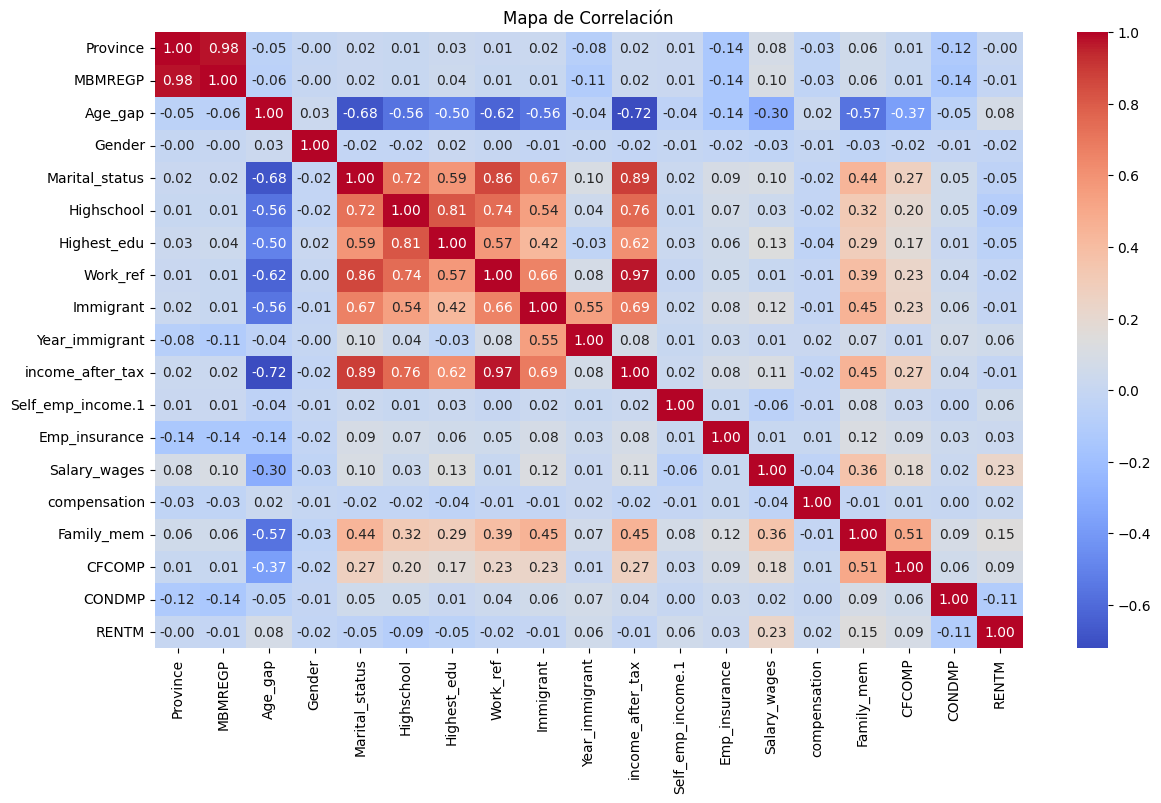

In [17]:
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

In [18]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature         VIF
0            Province  149.436678
1             MBMREGP  106.848859
7            Work_ref   62.694973
9      Year_immigrant   33.903576
2             Age_gap   15.254041
6         Highest_edu   13.801290
8           Immigrant   11.244031
15         Family_mem    9.917812
3              Gender    9.580008
5          Highschool    9.564402
16             CFCOMP    8.088666
4      Marital_status    6.906673
13       Salary_wages    2.780574
12      Emp_insurance    1.183235
11  Self_emp_income.1    1.073864
14       compensation    1.023827
18              RENTM   -0.056347
17             CONDMP   -0.056967
10   income_after_tax   -0.295641


In [19]:
columns_to_drop = ["Province"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,Year_immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,6,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,6,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,6,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,6,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [20]:
columns_to_drop = ["Year_immigrant"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [21]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature        VIF
6            Work_ref  61.729264
1             Age_gap  14.455974
5         Highest_edu  13.794776
13         Family_mem   9.863699
4          Highschool   9.551760
2              Gender   9.373726
14             CFCOMP   8.006429
3      Marital_status   6.902798
7           Immigrant   5.974188
0             MBMREGP   4.444691
11       Salary_wages   2.747508
10      Emp_insurance   1.179334
9   Self_emp_income.1   1.073235
12       compensation   1.023433
15             CONDMP  -0.047846
16              RENTM  -0.054835
8    income_after_tax  -0.285091


In [22]:
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['income_after_tax'])  # Replace 'Target_Variable' with your actual target
y = data['income_after_tax']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_pred = logreg.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))